In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


In [2]:
#import csv, parse dates
df = pd.read_csv('fcc-forum-pageviews.csv', index_col='date', parse_dates=True, sep=',')
#df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=True, sep=',')
print(df)

             value
date              
2016-05-09    1201
2016-05-10    2329
2016-05-11    1716
2016-05-12   10539
2016-05-13    6933
...            ...
2019-11-29  171584
2019-11-30  141161
2019-12-01  142918
2019-12-02  220144
2019-12-03  158549

[1304 rows x 1 columns]


In [3]:
#clean data
#print(df['value'].isna().sum())
#print(df['value'].astype('int').count())
df = df[(df['value'] > df['value'].quantile(.025)) & (df['value'] < df['value'].quantile(.975))]
print(len(df))

1238


Text(0.5, 1.0, 'Daily FreeCodeCamp Forum Page Views 05/19/2016 - 12/03/2019')

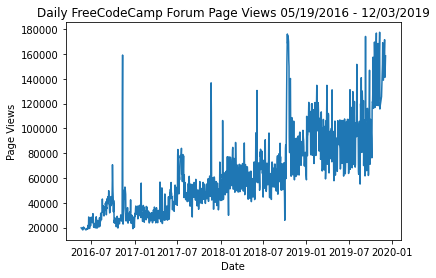

In [4]:
fig, ax = plt.subplots()
plt.plot(df['value'])
plt.xlabel("Date")
plt.ylabel("Page Views")


def formatDate (dateStr):
    return dateStr.strftime("%m/%d/%Y")
start = formatDate(df.index[0])
end = formatDate(df.index[-1])
title = "Daily FreeCodeCamp Forum Page Views " + start + ' - ' + end
plt.title(title)
#sns.lineplot(label="Page Views", data=df, xlabel='Date')

In [5]:
#Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". 
#It should show average daily page views for each month grouped by year. 
#The legend should show month labels and have a title of "Months". 
#On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".

df_bar = df.copy()
print(df_bar)

             value
date              
2016-05-19   19736
2016-05-26   18060
2016-05-27   19997
2016-05-28   19044
2016-05-29   20325
...            ...
2019-11-24  138875
2019-11-29  171584
2019-11-30  141161
2019-12-01  142918
2019-12-03  158549

[1238 rows x 1 columns]


In [6]:
df_bar['Years'] = df_bar.index.year
#df_bar['months'] = df_bar.index.month
df_bar['Months'] = df_bar.index.strftime("%B")
print(df_bar)

             value  Years    Months
date                               
2016-05-19   19736   2016       May
2016-05-26   18060   2016       May
2016-05-27   19997   2016       May
2016-05-28   19044   2016       May
2016-05-29   20325   2016       May
...            ...    ...       ...
2019-11-24  138875   2019  November
2019-11-29  171584   2019  November
2019-11-30  141161   2019  November
2019-12-01  142918   2019  December
2019-12-03  158549   2019  December

[1238 rows x 3 columns]


In [7]:
#grouped = df_bar.groupby('years','months')
#rint(grouped['Months'].agg(np.mean))

df_bar_grouped = df_bar.groupby(['Years','Months'], sort=False, as_index=False)
df_bar_grouped = df_bar_grouped['value'].mean()
print(df_bar_grouped)

    Years     Months          value
0    2016        May   19432.400000
1    2016       June   21875.105263
2    2016       July   24109.678571
3    2016     August   31049.193548
4    2016  September   41476.866667
5    2016    October   27398.322581
6    2016   November   40448.633333
7    2016   December   27832.419355
8    2017    January   32785.161290
9    2017   February   31113.071429
10   2017      March   29369.096774
11   2017      April   30878.733333
12   2017        May   34244.290323
13   2017       June   43577.500000
14   2017       July   65806.838710
15   2017     August   47712.451613
16   2017  September   47376.800000
17   2017    October   47438.709677
18   2017   November   57701.566667
19   2017   December   48420.580645
20   2018    January   58580.096774
21   2018   February   65679.000000
22   2018      March   62693.774194
23   2018      April   62350.833333
24   2018        May   56562.870968
25   2018       June   70117.000000
26   2018       July   63591

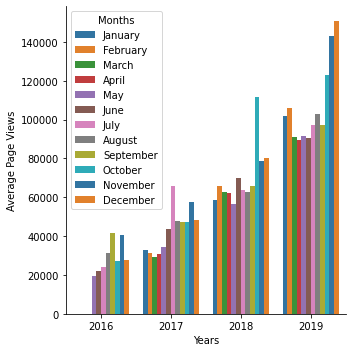

In [8]:
months = ['January',
'February',
'March',
'April',
'May',
'June',
'July',
'August',
'September',
'October',
'November',
'December'
]

g = sns.catplot(
    data=df_bar_grouped, 
    x='Years',
    y='value',
    #col='months',
    hue='Months',
    hue_order=months,
    kind='bar',
    legend_out=False,
    #legend=False,
    palette = sns.color_palette()
)

g.set(xlabel='Years', ylabel='Average Page Views')



In [12]:
#Create a draw_box_plot function that uses Searborn to draw two adjacent box plots similar to "examples/Figure_3.png".
#These box plots should show how the values are distributed within a given year or month and how it compares over time.
#The title of the first chart should be "Year-wise Box Plot (Trend)" 
#and the title of the second chart should be "Month-wise Box Plot (Seasonality)". 
#Make sure the month labels on bottom start at "Jan" and the x and x axis are labeled correctly.
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

print(df_box)

           date   value  year month
0    2016-05-19   19736  2016   May
1    2016-05-26   18060  2016   May
2    2016-05-27   19997  2016   May
3    2016-05-28   19044  2016   May
4    2016-05-29   20325  2016   May
...         ...     ...   ...   ...
1233 2019-11-24  138875  2019   Nov
1234 2019-11-29  171584  2019   Nov
1235 2019-11-30  141161  2019   Nov
1236 2019-12-01  142918  2019   Dec
1237 2019-12-03  158549  2019   Dec

[1238 rows x 4 columns]


[Text(209.74318181818177, 0.5, 'Page Views'),
 Text(0.5, 15.0, 'Month'),
 Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)')]

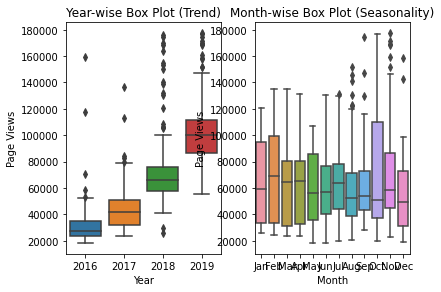

In [42]:
#boxplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, 
#orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, 
#fliersize=5, linewidth=None, whis=1.5, ax=None, **kwargs)
'''
box = sns.boxplot(
    data=df_box,
    x='year',
    y='value'
)
'''
shortMonths = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
sns.boxplot(x='year', y='value', data=df_box, ax=ax1)
fig.tight_layout()
sns.boxplot(x='month', y='value', order=shortMonths, data=df_box, ax=ax2)
ax1.set(xlabel='Year', ylabel='Page Views', title='Year-wise Box Plot (Trend)')
ax2.set(xlabel='Month', ylabel='Page Views', title='Month-wise Box Plot (Seasonality)')